In [1]:
import os
import pandas as pd
import re
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
from seaborn import plotting_context
from seaborn import axes_style
import seaborn.objects as so

In [ ]:
cc_corpus = pd.read_csv("../data/HI-CC_data.tsv", sep="\t")

In [ ]:
def calculate_porportions(corpus):
    answers = ["yes", "no"]
    prop_dict = {}
    for answer in answers:
        proportion = round(len(corpus.loc[corpus["HI"]==answer])/len(corpus), 3)*100
        print(f"Percentage of {answer}, articles: {proportion}%")
        prop_dict[answer] = proportion
    return prop_dict

In [40]:
cc_dict = calculate_porportions(cc_corpus)

Percentage of yes, articles: 34.1%
Percentage of no, articles: 65.7%


In [41]:
# List of pronouns to look for
this_pronouns = {
    # Personal Pronouns
    # "you", "he", "she", "it", "we", "they",
    "i": 0, "you": 0, "he": 0, "she": 0, "it": 0, "we": 0, "they": 0,

    # Object
    "me": 0, "her": 0, "him": 0, "us": 0, "them": 0,

    # Possessive Pronouns
    'my': 0, 'your': 0,  'our': 0, 'their': 0, "its": 0,
    'mine': 0, 'yours': 0, 'his': 0, 'hers': 0, 'ours': 0, 'theirs': 0,
    # "im", "mine", "yours", "his", "hers", "its", "ours", "theirs",
    

    # Reflexive Pronouns
    # "myself", "yourself", "himself", "herself", "itself", "ourselves", "themselves"
}



# vectorizer = TfidfVectorizer()
# tfidf_matrix = vectorizer.fit_transform(cc_corpus["Full text"])



In [42]:
def count_pronouns(text, pronouns):
    text_list = text.lower().replace("[,.']", "", ).split(" ")
    for token in text_list:
        if token in pronouns.keys():
            pronouns[token] += 1

    for pronoun in pronouns:
        pronouns[pronoun] = round(pronouns[pronoun]/len(text_list), 4)
    return pronouns
    

In [43]:
def normalise_pron_over_pron(text, pronouns):
    text_list = text.lower().replace("[,.']", "", ).split(" ")
    mapped_list = {'you': '2_pers.', 'yours': '2_pers.', 'your': '2_pers.',
                  'he': '3_sing_masc.', 'his': '3_sing_masc.', 'him': '3_sing_masc.',
                  'she': '3_sing_fem.', 'hers': '3_sing_fem.', 'her': '3_sing_fem.',
                  'it': '3_sing_neu.', 'its': '3_sing_neu.', 'itself': '3_sing_neu',
                  'we': '1_pers._plu', 'ours': '1_pers._plu', 'our': '1_pers._plu', 'us': '1_pers._plu',
                  'they': '3_pers._plu', 'theirs': '3_pers._plu', 'their': '3_pers._plu', 'them': '3_pers._plu',
                  'i': '1_pers._sing', 'mine': '1_pers._sing', 'my': '1_pers._sing', 'me': '1_pers._sing',
                  }
    unique_prons = {"1_pers._sing": 0,
                    "1_pers._plu": 0,
                    "2_pers.": 0,
                    "3_sing_masc.": 0,
                    "3_sing_fem.": 0,
                    "3_sing_neu.": 0,
                    "3_pers._plu": 0}
    for token in text_list:
        if token in pronouns.keys():
            mapped_pron = mapped_list[token]
            unique_prons[mapped_pron] += 1


    total_pronouns = sum(unique_prons.values())
    if total_pronouns == 0:
        return unique_prons
    normalised_prons = {}
    for pronoun in unique_prons:
        normalised_prons[pronoun] = round(unique_prons[pronoun]/total_pronouns, 4)
    return normalised_prons

## used at the end of the notebook

In [44]:
pron_list = []
for i in range(len(cc_corpus["Full text"])):
    pron_list.append(count_pronouns(cc_corpus["Full text"].iloc[i], this_pronouns.copy()))

In [45]:
# # Get the TF-IDF values for each pronoun
# pronoun_tfidf_values = tfidf_matrix[:, [vectorizer.vocabulary_[pronoun] for pronoun in pronouns]]

# # Convert the TF-IDF values to a dataframe
# pronoun_tfidf_df = pd.DataFrame(pronoun_tfidf_values.toarray(), columns=pronouns)

pronoun_df = pd.DataFrame(pron_list)

In [46]:
# Add labels
pronoun_df["HI-label"] = cc_corpus["answer"]
# pronoun_df["Country"] = cc_corpus["Country"]
# pronoun_df["Outlet"] = cc_corpus["Outlet"]

In [47]:
pronoun_df

,i,you,he,she,it,we,they,me,her,him,...,our,their,its,mine,yours,his,hers,ours,theirs,HI-label
0,0.0000,0.0000,0.0046,0.0000,0.0061,0.0000,0.0030,0.0000,0.0000,0.0000,...,0.0015,0.0015,0.0137,0.0,0.0,0.0000,0.0,0.0000,0.0,no
1,0.0010,0.0000,0.0059,0.0000,0.0010,0.0000,0.0020,0.0020,0.0000,0.0029,...,0.0000,0.0020,0.0000,0.0,0.0,0.0059,0.0,0.0000,0.0,no
2,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0136,0.0,0.0,0.0204,0.0,0.0000,0.0,no
3,0.0000,0.0000,0.0000,0.0042,0.0021,0.0000,0.0021,0.0021,0.0085,0.0000,...,0.0000,0.0085,0.0000,0.0,0.0,0.0000,0.0,0.0000,0.0,yes
4,0.0032,0.0000,0.0000,0.0000,0.0064,0.0064,0.0032,0.0016,0.0000,0.0000,...,0.0064,0.0016,0.0048,0.0,0.0,0.0000,0.0,0.0016,0.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10212,0.0000,0.0000,0.0000,0.0053,0.0053,0.0000,0.0000,0.0000,0.0053,0.0000,...,0.0000,0.0000,0.0000,0.0,0.0,0.0000,0.0,0.0000,0.0,yes
10213,0.0006,0.0012,0.0025,0.0000,0.0074,0.0006,0.0043,0.0000,0.0000,0.0006,...,0.0000,0.0031,0.0086,0.0,0.0,0.0012,0.0,0.0000,0.0,no
10214,0.0067,0.0000,0.0089,0.0022,0.0000,0.0022,0.0000,0.0000,0.0000,0.0000,...,0.0022,0.0022,0.0067,0.0,0.0,0.0067,0.0,0.0000,0.0,no
10215,0.0047,0.0029,0.0023,0.0035,0.0058,0.0018,0.0035,0.0006,0.0006,0.0000,...,0.0006,0.0029,0.0006,0.0,0.0,0.0023,0.0,0.0000,0.0,yes


In [48]:
pronouns_hi = pronoun_df.loc[pronoun_df["HI-label"]=="yes"]
pronouns_nonhi = pronoun_df.loc[pronoun_df["HI-label"]=="no"]

In [49]:
pronouns_hi = pronouns_hi[pronouns_hi.columns[:-1]]
pronouns_nonhi = pronouns_nonhi[pronouns_nonhi.columns[:-1]]

In [50]:
df_hi_sum = pronouns_hi.mean().reset_index()
df_hi_sum.columns = ['Pronoun', 'HI']

df_nonhi_sum = pronouns_nonhi.mean().reset_index()
df_nonhi_sum.columns = ['Pronoun', 'Non-HI']

# Concatenate the two dataframes
df_concat = pd.concat([df_hi_sum, df_nonhi_sum], axis=0)

# Melt the dataframe to create a long format
df_melted = pd.melt(df_concat, id_vars='Pronoun', value_vars=['HI', 'Non-HI'])



In [51]:
# vectorizer.vocabulary_["i"]

In [52]:
df_melted

,Pronoun,variable,value
0,i,HI,4.331728e-03
1,you,HI,1.983434e-03
2,he,HI,7.092061e-03
3,she,HI,4.200115e-03
4,it,HI,4.789338e-03
...,...,...,...
87,yours,Non-HI,2.741767e-06
88,his,Non-HI,2.990568e-03
89,hers,Non-HI,6.705409e-07
90,ours,Non-HI,2.443749e-06


In [53]:
df_melted = df_melted[df_melted["value"].notna()]

In [54]:
df_melted["Pronoun_"] = df_melted["Pronoun"].apply(lambda x: {'you': '2_pers.', 'yours': '2_pers.', 'your': '2_pers.',
                                      'he': '3_sing_masc.', 'his': '3_sing_masc.', 'him': '3_sing_masc.',
                                      'she': '3_sing_fem.', 'hers': '3_sing_fem.', 'her': '3_sing_fem.',
                                      'it': '3_sing_neu.', 'its': '3_sing_neu.', 'itself': '3_sing_neu',
                                      'we': '1_pers._plu', 'ours': '1_pers._plu', 'our': '1_pers._plu', 'us': '1_pers._plu',
                                      'they': '3_pers._plu', 'theirs': '3_pers._plu', 'their': '3_pers._plu', 'them': '3_pers._plu',
                                      'i': '1_pers._sing', 'mine': '1_pers._sing', 'my': '1_pers._sing', 'me': '1_pers._sing',
                                      }[x])


/var/folders/rn/c54v0kc93nnc4r9vdjn_2rkr0000gn/T/ipykernel_94572/958025018.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_melted["Pronoun_"] = df_melted["Pronoun"].apply(lambda x: {'you': '2_pers.', 'yours': '2_pers.', 'your': '2_pers.',


In [55]:
pronoun_sums = {}
classes = df_melted["variable"].unique()
groups = df_melted.groupby("Pronoun_").groups
for pronoun in groups.keys():
    for this_class in classes:
        this_pronoun = f"{pronoun}:{this_class}"
        this_sum = df_melted.loc[(df_melted['Pronoun_']==pronoun)&(df_melted['variable']==this_class)]['value'].mean()
        this_std = df_melted.loc[(df_melted['Pronoun_']==pronoun)&(df_melted['variable']==this_class)]['value'].sem()
        pronoun_sums[this_pronoun] = [this_sum, this_std]
        print(f"{pronoun}:{this_class}: avg= {df_melted.loc[(df_melted['Pronoun_']==pronoun)&(df_melted['variable']==this_class)]['value'].mean()}, std= {df_melted.loc[(df_melted['Pronoun_']==pronoun)&(df_melted['variable']==this_class)]['value'].sem()}"
             )

1_pers._plu:HI: avg= 0.0010103396388650044, std= 0.0005062817202607419
1_pers._plu:Non-HI: avg= 0.0008084339144687825, std= 0.0003506160446572392
1_pers._sing:HI: avg= 0.0017677414732014901, std= 0.0009364102192474948
1_pers._sing:Non-HI: avg= 0.0003864252719415884, std= 0.00022610066300443588
2_pers.:HI: avg= 0.0009468042419031241, std= 0.0005736939198287558
2_pers.:Non-HI: avg= 0.0007613669100481798, std= 0.00041565011438716325
3_pers._plu:HI: avg= 0.0019218973918028088, std= 0.0008240434919170951
3_pers._plu:Non-HI: avg= 0.001408448815377738, std= 0.0006159407380535418
3_sing_fem.:HI: avg= 0.002957170153816758, std= 0.0014796929789198513
3_sing_fem.:Non-HI: avg= 0.0005293001539760591, std= 0.0002643852757929981
3_sing_masc.:HI: avg= 0.0047577051686252024, std= 0.0017577968153241605
3_sing_masc.:Non-HI: avg= 0.0024370436596632392, std= 0.000981232294092132
3_sing_neu.:HI: avg= 0.0030059615935798226, std= 0.0017833763255947267
3_sing_neu.:Non-HI: avg= 0.003730874683355685, std= 0.0010

In [78]:
df_melted

,Pronoun,variable,value,Pronoun_
0,i,HI,4.331728e-03,1_pers._sing
1,you,HI,1.983434e-03,2_pers.
2,he,HI,7.092061e-03,3_sing_masc.
3,she,HI,4.200115e-03,3_sing_fem.
4,it,HI,4.789338e-03,3_sing_neu.
5,we,HI,2.362052e-03,1_pers._plu
6,they,HI,3.413299e-03,3_pers._plu
7,me,HI,8.320436e-04,1_pers._sing
8,her,HI,4.661594e-03,3_sing_fem.
9,him,HI,1.313987e-03,3_sing_masc.


In [56]:
pronoun_df_sums = pd.DataFrame.from_dict([pronoun_sums])

In [57]:
pronoun_df_sums = pronoun_df_sums.T

In [58]:
pronoun_df_sums.reset_index(inplace=True)

In [59]:
pronoun_df_sums["Pronoun"] = pronoun_df_sums["index"].apply(lambda x: x.split(":")[0])
pronoun_df_sums["Class"] = pronoun_df_sums["index"].apply(lambda x: x.split(":")[1])

In [60]:
pronoun_df_sums.columns = ['merged', "Value", 'Pronoun', 'Class']

In [61]:
df_hi_avg = pronouns_hi[['you', 'he', 'she', 'it', 'we', 'they', 'mine', 'yours', 'his', 'hers',
       'its', 'ours', 'theirs']].mean().reset_index()
df_hi_avg.columns = ['Pronoun', 'HI']

df_nonhi_avg = pronouns_nonhi[['you', 'he', 'she', 'it', 'we', 'they', 'mine', 'yours', 'his', 'hers',
       'its', 'ours', 'theirs']].mean().reset_index()
df_nonhi_avg.columns = ['Pronoun', 'Non-HI']

# Concatenate the two dataframes
df_concat_avg = pd.concat([df_hi_avg, df_nonhi_avg], axis=0)

# Melt the dataframe to create a long format
df_melted_avg = pd.melt(df_concat_avg, id_vars='Pronoun', value_vars=['HI', 'Non-HI'])

In [62]:
df_melted_avg = df_melted_avg[df_melted_avg["value"].notna()]

In [63]:
df_melted_avg["Pronoun_"] = df_melted_avg["Pronoun"].apply(lambda x: {'you': 'You', 'yours': 'You', 'yourself': 'You',
                                      'he': 'He', 'himself': 'He', 'his': 'He',
                                      'she': 'She', 'hers': 'She', 'herself': 'She',
                                      'it': 'It', 'its': 'It', 'itself': 'It',
                                      'we': 'We', 'ours': 'We', 'ourselves': 'We',
                                      'they': 'They', 'theirs': 'They', 'themselves': 'They',
                                      'mine': 'I', 'myself': 'I', 'im': 'I'
                                      }[x])


In [64]:
# pronoun_avgs = {}
# classes = df_melted_avg["variable"].unique()
# avg_groups = df_melted_avg.groupby("Pronoun_").groups
# for pronoun in avg_groups.keys():
#     for this_class in classes:
#         this_pronoun = f"{pronoun}_{this_class}"
#         this_sum = round(df_melted_avg.loc[(df_melted_avg['Pronoun_']==pronoun)&(df_melted_avg['variable']==this_class)]['value'].sum(), 3)
#         pronoun_avgs[this_pronoun] = this_sum

In [65]:
pronoun_df_sums["Average"] = pronoun_df_sums["Value"].apply(lambda x: round(x[0], 4))
pronoun_df_sums["Std"] = pronoun_df_sums["Value"].apply(lambda x: round(x[1], 4))

In [66]:
pronoun_df_sums


,merged,Value,Pronoun,Class,Average,Std
0,1_pers._plu:HI,"[0.0010103396388650044, 0.0005062817202607419]",1_pers._plu,HI,0.0010,0.0005
1,1_pers._plu:Non-HI,"[0.0008084339144687825, 0.0003506160446572392]",1_pers._plu,Non-HI,0.0008,0.0004
2,1_pers._sing:HI,"[0.0017677414732014901, 0.0009364102192474948]",1_pers._sing,HI,0.0018,0.0009
3,1_pers._sing:Non-HI,"[0.0003864252719415884, 0.00022610066300443588]",1_pers._sing,Non-HI,0.0004,0.0002
4,2_pers.:HI,"[0.0009468042419031241, 0.0005736939198287558]",2_pers.,HI,0.0009,0.0006
5,2_pers.:Non-HI,"[0.0007613669100481798, 0.00041565011438716325]",2_pers.,Non-HI,0.0008,0.0004
6,3_pers._plu:HI,"[0.0019218973918028088, 0.0008240434919170951]",3_pers._plu,HI,0.0019,0.0008
7,3_pers._plu:Non-HI,"[0.001408448815377738, 0.0006159407380535418]",3_pers._plu,Non-HI,0.0014,0.0006
8,3_sing_fem.:HI,"[0.002957170153816758, 0.0014796929789198513]",3_sing_fem.,HI,0.0030,0.0015
9,3_sing_fem.:Non-HI,"[0.0005293001539760591, 0.0002643852757929981]",3_sing_fem.,Non-HI,0.0005,0.0003


In [67]:
pronoun_df_avgs = pd.DataFrame.from_dict([pronoun_avgs]).T.reset_index()
pronoun_df_avgs["Pronoun"] = pronoun_df_avgs["index"].apply(lambda x: x.split("_")[0])
pronoun_df_avgs["Class"] = pronoun_df_avgs["index"].apply(lambda x: x.split("_")[1])
pronoun_df_avgs.columns = ['merged', "Value", 'Pronoun', 'Class']

In [68]:
# pronoun_df_sums[['1_pers._sing', '2_pers.', '1_pers._plu', '3_pers._plu', '3_sing_fem.', '3_sing_masc.', '3_sing_neu.']]
pronoun_df_sums

,merged,Value,Pronoun,Class,Average,Std
0,1_pers._plu:HI,"[0.0010103396388650044, 0.0005062817202607419]",1_pers._plu,HI,0.0010,0.0005
1,1_pers._plu:Non-HI,"[0.0008084339144687825, 0.0003506160446572392]",1_pers._plu,Non-HI,0.0008,0.0004
2,1_pers._sing:HI,"[0.0017677414732014901, 0.0009364102192474948]",1_pers._sing,HI,0.0018,0.0009
3,1_pers._sing:Non-HI,"[0.0003864252719415884, 0.00022610066300443588]",1_pers._sing,Non-HI,0.0004,0.0002
4,2_pers.:HI,"[0.0009468042419031241, 0.0005736939198287558]",2_pers.,HI,0.0009,0.0006
5,2_pers.:Non-HI,"[0.0007613669100481798, 0.00041565011438716325]",2_pers.,Non-HI,0.0008,0.0004
6,3_pers._plu:HI,"[0.0019218973918028088, 0.0008240434919170951]",3_pers._plu,HI,0.0019,0.0008
7,3_pers._plu:Non-HI,"[0.001408448815377738, 0.0006159407380535418]",3_pers._plu,Non-HI,0.0014,0.0006
8,3_sing_fem.:HI,"[0.002957170153816758, 0.0014796929789198513]",3_sing_fem.,HI,0.0030,0.0015
9,3_sing_fem.:Non-HI,"[0.0005293001539760591, 0.0002643852757929981]",3_sing_fem.,Non-HI,0.0005,0.0003


In [70]:
pronoun_df_sums

,merged,Value,Pronoun,Class,Average,Std
0,1_pers._plu:HI,"[0.0010103396388650044, 0.0005062817202607419]",1_pers._plu,HI,0.0010,0.0005
1,1_pers._plu:Non-HI,"[0.0008084339144687825, 0.0003506160446572392]",1_pers._plu,Non-HI,0.0008,0.0004
2,1_pers._sing:HI,"[0.0017677414732014901, 0.0009364102192474948]",1_pers._sing,HI,0.0018,0.0009
3,1_pers._sing:Non-HI,"[0.0003864252719415884, 0.00022610066300443588]",1_pers._sing,Non-HI,0.0004,0.0002
4,2_pers.:HI,"[0.0009468042419031241, 0.0005736939198287558]",2_pers.,HI,0.0009,0.0006
5,2_pers.:Non-HI,"[0.0007613669100481798, 0.00041565011438716325]",2_pers.,Non-HI,0.0008,0.0004
6,3_pers._plu:HI,"[0.0019218973918028088, 0.0008240434919170951]",3_pers._plu,HI,0.0019,0.0008
7,3_pers._plu:Non-HI,"[0.001408448815377738, 0.0006159407380535418]",3_pers._plu,Non-HI,0.0014,0.0006
8,3_sing_fem.:HI,"[0.002957170153816758, 0.0014796929789198513]",3_sing_fem.,HI,0.0030,0.0015
9,3_sing_fem.:Non-HI,"[0.0005293001539760591, 0.0002643852757929981]",3_sing_fem.,Non-HI,0.0005,0.0003


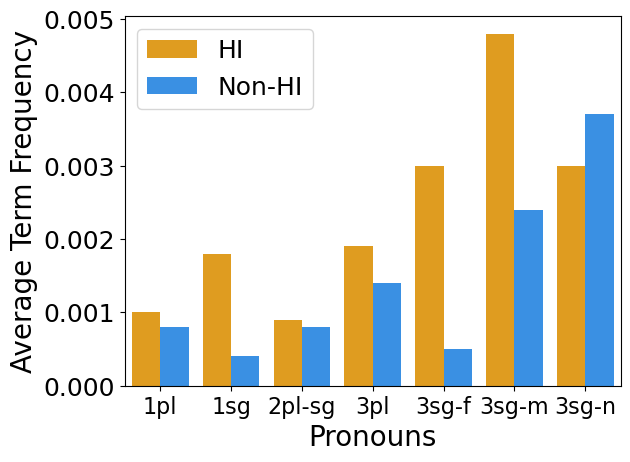

In [106]:

sns.barplot(x="Pronoun", y="Average", hue="Class", data=pronoun_df_sums.sort_values(by="Pronoun"), palette=["orange", "dodgerblue"], errorbar='sd')
# plt.xticks(rotation=90, ha='right')#, fontdict={'size': 20})
plt.tick_params(axis='x', labelsize=16)
this_xlabels = ["1pl", "1sg", "2pl-sg", "3pl", "3sg-f", "3sg-m", "3sg-n" ]
plt.xticks(range(len(this_xlabels)), this_xlabels)
plt.tick_params(axis='y', labelsize=18)
plt.ylabel("Average Term Frequency", fontdict={'size': 20})
plt.xlabel("Pronouns", fontdict={'size': 20})
plt.legend(prop={'size': 18})
plt.savefig("../docs/avg_pronouns.pdf",bbox_inches='tight')
plt.show()


In [ ]:
sns.barplot(x="Pronoun", y="Average", hue="Class", data=pronoun_df_sums.sort_values(by="Pronoun"), palette=["orange", "dodgerblue"], errorbar='sd')
plt.xticks(rotation=90, ha='right')
# plt.savefig("../docs/avg_pronouns.pdf",bbox_inches='tight')
plt.show()

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, '1_pers._plu'),
  Text(1, 0, '1_pers._sing'),
  Text(2, 0, '2_pers.'),
  Text(3, 0, '3_pers._plu'),
  Text(4, 0, '3_sing_fem.'),
  Text(5, 0, '3_sing_masc.'),
  Text(6, 0, '3_sing_neu.')])

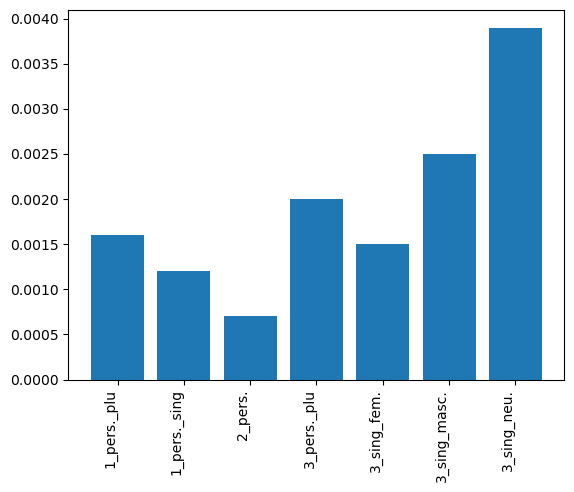

In [612]:
fig, ax = plt.subplots()

fruits = ['apple', 'blueberry', 'cherry', 'orange']
counts = [40, 100, 30, 55]
bar_labels = ['red', 'blue', '_red', 'orange']
# bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

for i, group in enumerate(pronoun_df_sums["Pronoun"].unique):
     p = ax.bar(list(res.keys()),res_arr[i], width, 
                label=group

ax.bar(pronoun_df_sums["Pronoun"], pronoun_df_sums["Average"])#, label=bar_labels)#, color=bar_colors)
plt.xticks(rotation=90, ha='right')

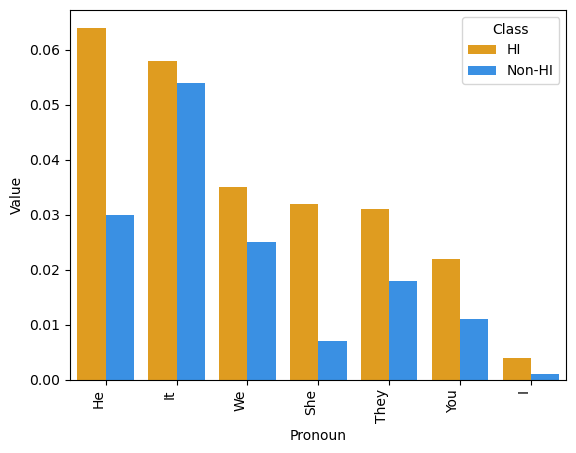

In [543]:
sns.barplot(x="Pronoun", y="Value", hue="Class", data=pronoun_df_avgs.sort_values(by="Value", ascending=False), palette=["orange", "dodgerblue"])
plt.xticks(rotation=90, ha='right')
plt.show()


In [284]:
pronoun_df_avgs.sort_values(by=["Value"], ascending=False)

,merged,Value,Pronoun,Class
0,He_HI,0.064,He,HI
4,It_HI,0.058,It,HI
5,It_Non-HI,0.054,It,Non-HI
10,We_HI,0.035,We,HI
6,She_HI,0.032,She,HI
8,They_HI,0.031,They,HI
1,He_Non-HI,0.030,He,Non-HI
11,We_Non-HI,0.025,We,Non-HI
12,You_HI,0.022,You,HI
9,They_Non-HI,0.018,They,Non-HI


In [573]:
pronoun_df_sums

,merged,Value,Pronoun,Class,Average
0,1_pers._plu:HI,"[0.0015772101449275362, 0.001550736219989253]",1_pers._plu,HI,0.0016
1,1_pers._plu:Non-HI,"[0.001311728432563791, 0.0011765573996078112]",1_pers._plu,Non-HI,0.0013
2,1_pers._sing:HI,"[0.0011729710144927537, 0.0012831570265145315]",1_pers._sing,HI,0.0012
3,1_pers._sing:Non-HI,"[0.00022620291616038885, 0.0002567704104887153]",1_pers._sing,Non-HI,0.0002
4,2_pers.:HI,"[0.0007390499194847021, 0.0008181845124204893]",2_pers.,HI,0.0007
5,2_pers.:Non-HI,"[0.000366897529364115, 0.0003933537787446888]",2_pers.,Non-HI,0.0004
6,3_pers._plu:HI,"[0.001970917874396135, 0.0017109293564720074]",3_pers._plu,HI,0.0020
7,3_pers._plu:Non-HI,"[0.0012750820170109357, 0.001154721283102197]",3_pers._plu,Non-HI,0.0013
8,3_sing_fem.:HI,"[0.0014562479871175523, 0.001303431684286014]",3_sing_fem.,HI,0.0015
9,3_sing_fem.:Non-HI,"[0.0002755933576346699, 0.0002896269986060423]",3_sing_fem.,Non-HI,0.0003


In [626]:
mapping = {'you': '2_pers.', 'yours': '2_pers.', 'your': '2_pers.',
                                      'he': '3_sing_masc.', 'his': '3_sing_masc.', 'him': '3_sing_masc.',
                                      'she': '3_sing_fem.', 'hers': '3_sing_fem.', 'her': '3_sing_fem.',
                                      'it': '3_sing_neu.', 'its': '3_sing_neu.', 'itself': '3_sing_neu',
                                      'we': '1_pers._plu', 'ours': '1_pers._plu', 'our': '1_pers._plu', 'us': '1_pers._plu',
                                      'they': '3_pers._plu', 'theirs': '3_pers._plu', 'their': '3_pers._plu', 'them': '3_pers._plu',
                                      'i': '1_pers._sing', 'mine': '1_pers._sing', 'my': '1_pers._sing', 'me': '1_pers._sing'}

In [630]:
for i in sorted(mapping.keys()):
    print(mapping[i], i)

3_sing_masc. he
3_sing_fem. her
3_sing_fem. hers
3_sing_masc. him
3_sing_masc. his
1_pers._sing i
3_sing_neu. it
3_sing_neu. its
3_sing_neu itself
1_pers._sing me
1_pers._sing mine
1_pers._sing my
1_pers._plu our
1_pers._plu ours
3_sing_fem. she
3_pers._plu their
3_pers._plu theirs
3_pers._plu them
3_pers._plu they
1_pers._plu us
1_pers._plu we
2_pers. you
2_pers. your
2_pers. yours


In [98]:
norm_prons = [normalise_pron_over_pron(i, this_pronouns.copy()) for i in cc_corpus["Full text"]] 

In [99]:
pronouns_df = pd.DataFrame(norm_prons)

In [100]:
pronouns_df["vectors"] = [x for x in pronouns_df[['1_pers._sing', '3_sing_masc.', '3_sing_fem.', '3_sing_neu.']].to_numpy()] #.apply(lambda x: x.numpy)

In [106]:
pd.concat([cc_corpus, pronouns_df], axis=1)[["index_id", '1_pers._sing', '3_sing_masc.', '3_sing_fem.', '3_sing_neu.', "vectors"]].to_json("../data/20240809_pronoun_data_includes-it.json")


In [107]:
pronouns_df["vectors"] = [x for x in pronouns_df[['1_pers._sing', '3_sing_masc.', '3_sing_fem.']].to_numpy()] #.apply(lambda x: x.numpy)

In [109]:
pd.concat([cc_corpus, pronouns_df], axis=1)[["index_id", '1_pers._sing', '3_sing_masc.', '3_sing_fem.', "vectors"]].to_json("../data/20240809_pronoun_data.json")


In [119]:
another_mapping = {'1_pers._sing' : '1sg', '2_pers.' : '2pl-sg', '3_sing_masc.' : '3sg-m', '3_sing_fem.' : '3sg-f',
       '3_sing_neu.' : '3sg-n', '1_pers._plu': '1pl', '3_pers._plu' : '3pl'}

In [123]:
df_melted["pronouns"] = df_melted["Pronoun_"].map(another_mapping)

/var/folders/rn/c54v0kc93nnc4r9vdjn_2rkr0000gn/T/ipykernel_94572/2358896927.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_melted["pronouns"] = df_melted["Pronoun_"].map(another_mapping)


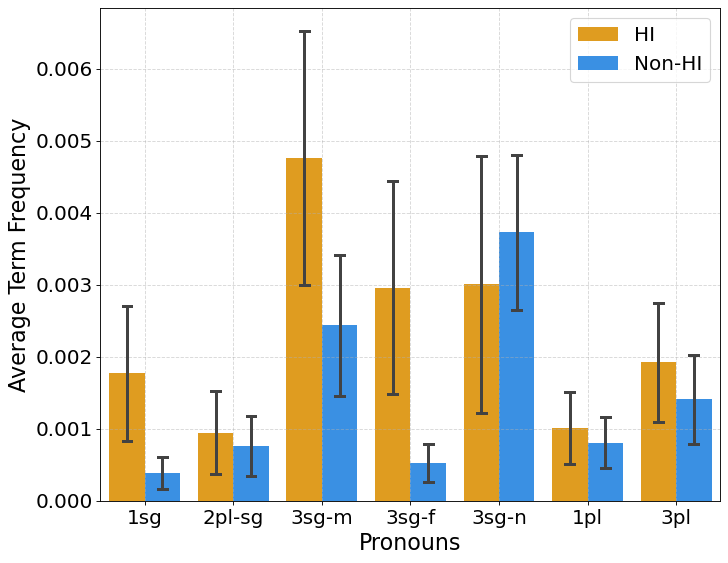

In [132]:
plt.figure(figsize=(10, 8), dpi=80) 
sns.barplot(df_melted, x="pronouns", y="value", hue="variable", errorbar="se", capsize=.1, palette=["orange", "dodgerblue"])
# this_xlabels = ["1pl", "1sg", "2pl-sg", "3pl", "3sg-f", "3sg-m", "3sg-n" ]
# plt.xticks(range(len(this_xlabels)), this_xlabels)
plt.grid(linestyle='--', alpha=0.5) 
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
# plt.title("Control Corpus", fontdict={'size': 20})
plt.ylabel("Average Term Frequency", fontdict={'size': 20})
plt.xlabel("Pronouns", fontdict={'size': 20})
plt.legend(prop={'size': 18})
# plt.savefig("../docs/avg_sem_pronouns_control.pdf",bbox_inches='tight')
plt.show()

In [124]:
df_melted

,Pronoun,variable,value,Pronoun_,pronouns
0,i,HI,4.331728e-03,1_pers._sing,1sg
1,you,HI,1.983434e-03,2_pers.,2pl-sg
2,he,HI,7.092061e-03,3_sing_masc.,3sg-m
3,she,HI,4.200115e-03,3_sing_fem.,3sg-f
4,it,HI,4.789338e-03,3_sing_neu.,3sg-n
5,we,HI,2.362052e-03,1_pers._plu,1pl
6,they,HI,3.413299e-03,3_pers._plu,3pl
7,me,HI,8.320436e-04,1_pers._sing,1sg
8,her,HI,4.661594e-03,3_sing_fem.,3sg-f
9,him,HI,1.313987e-03,3_sing_masc.,3sg-m
